In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tushare as ts
import time

In [2]:
t=pd.DataFrame(columns=["date","time","open","high","low","close"])
for year in range(1999,2016):
    temp = pd.read_csv(r"E:\\RH\\sh000001\\"+str(year)+"\\SH000001.csv",header=None)
    temp.drop(columns=[6,7],inplace=True)
    temp.rename(columns={0:"date",1:"time",2:"open",3:"high",4:"low",5:"close"},inplace=True)
    t=t.append(temp)

In [3]:
t[' ']=' '
t['new']=t['date']+t[' ']+t['time']
t['new'].astype('datetime64',copy = False)

t.drop(columns=[' '], inplace=True)

t.set_index('new',inplace=True)

In [4]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190656 entries, 1999/07/26 09:35 to 2015/12/31 15:00
Data columns (total 6 columns):
date     190656 non-null object
time     190656 non-null object
open     190656 non-null float64
high     190656 non-null float64
low      190656 non-null float64
close    190656 non-null float64
dtypes: float64(4), object(2)
memory usage: 10.2+ MB


In [336]:
now = ts.get_hist_data(code='sh', start=None, end=None, ktype='5',retry_count=3, pause=0.001)
now.sort_values(by='date',ascending=True, inplace=True)

In [6]:
len_t, len_now = len(t), len(now)

In [19]:
len_t, len_now = len(t), len(now)
max_corr, max_index = 0, -1
corr = list()
for i in range(0, len_t-len_now):
    temp_corr = np.corrcoef(x=t[i:i+len_now]['close'], y=now['close'])
    corr.append(temp_corr[1])
    if i%1000==0:print("finish:",i)
t1=time.time()
print("Duration: {}".format(t1-t0))

finish: 0
finish: 1000
finish: 2000
finish: 3000
finish: 4000
finish: 5000
finish: 6000
finish: 7000
finish: 8000
finish: 9000
finish: 10000
finish: 11000
finish: 12000
finish: 13000
finish: 14000
finish: 15000
finish: 16000
finish: 17000
finish: 18000
finish: 19000
finish: 20000
finish: 21000
finish: 22000
finish: 23000
finish: 24000
finish: 25000
finish: 26000
finish: 27000
finish: 28000
finish: 29000
finish: 30000
finish: 31000
finish: 32000
finish: 33000
finish: 34000
finish: 35000
finish: 36000
finish: 37000
finish: 38000
finish: 39000
finish: 40000
finish: 41000
finish: 42000
finish: 43000
finish: 44000
finish: 45000
finish: 46000
finish: 47000
finish: 48000
finish: 49000
finish: 50000
finish: 51000
finish: 52000
finish: 53000
finish: 54000
finish: 55000
finish: 56000
finish: 57000
finish: 58000
finish: 59000
finish: 60000
finish: 61000
finish: 62000
finish: 63000
finish: 64000
finish: 65000
finish: 66000
finish: 67000
finish: 68000
finish: 69000
finish: 70000
finish: 71000
finis

In [21]:
t=t.close

In [7]:
i=8148

In [20]:
corr = pd.DataFrame(corr)

In [28]:
corr.drop(columns=1, inplace=True)

In [195]:
ans = corr[corr[0]>0.75]

In [196]:
ans

,0
3482,0.750692
3483,0.752233
3484,0.750910
8144,0.753438
8145,0.765876
8146,0.775466
8147,0.788855
8148,0.800439
8149,0.809329
8150,0.815236


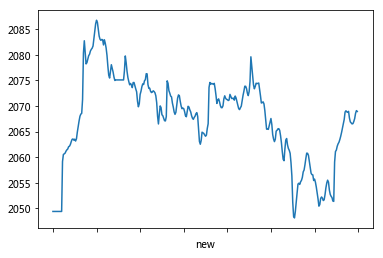

In [45]:
i=16045
t[i:i+len_now].plot()

#### 将相关系数大于阈值的序列分组，如果索引是连续的 则视为一组

In [215]:
group_list=[]
group=0; last_i=0

for i in ans.index:
    if i-last_i != 1: 
        group += 1
        last_i = i
    else:
        last_i += 1
    group_list.append(group)
ans = pd.DataFrame({0:list(ans[0]),1:group_list}, index=ans.index)

## 计算概率

In [223]:
TARGET_DAYS = [5, 20]
FREQUENCY = 5
TARGET_WINDOWS = [int(i*4*60/FREQUENCY) for i in TARGET_DAYS]

In [328]:
TARGET_WINDOWS

[240, 960]

In [331]:
def cal_prob(d:int):
    forward_length = TARGET_WINDOWS[d]
    index_max_corr = [
        int(ans_groups.get_group(j + 1).idxmax()[0]) for j in range(ans_groups.size().size)
    ]
    prob_up = sum(t[i] < t[i + len_now + forward_length]
                  for i in index_max_corr) / ans_groups.size().size
    prob_down = 1 - prob_up
    return prob_up, prob_down
cal_prob(1)

(0.4166666666666667, 0.5833333333333333)

In [173]:
if prob_up>prob_down:
    for i in index_max_corr:
        if t[i]<t[i+len_now+forward_length]:
            ans.loc[i, 'more_likely'] = 1
else:
    for i in index_max_corr:
        if t[i]>t[i+len_now+forward_length]:
            ans.loc[i, 'more_likely'] = 1

best_history_index = ans.where(ans.more_likely!=0).idxmax()[0]

### 调整坐标及缩放

In [133]:
i=best_history_index

future=dict()
future['upper']=t[i:i+len_now+forward_length].max()
future['lower']=t[i:i+len_now+forward_length].min()
future['mid']=(future['upper']+future['lower'])/2
future['width']=future['upper']-future['lower']
future['average']=t[i:i+len_now+forward_length].mean()
future['upward']=future['upper']-future['average']
future['downward']=future['average']-future['lower']

curt=dict()
curt['upper']=now['close'].max()
curt['lower']=now['close'].min()
curt['average']=now['close'].mean()
curt['width']=curt['upper']-curt['lower']
curt['mid']=(curt['upper']+curt['lower'])/2

a = (curt['lower']-curt['width']*future['downward']/future['width']*3)*future['average']/curt['average']
b = (curt['upper']+curt['width']*future['upward']/future['width']*3)*future['average']/curt['average']

(-65.45, 1374.45, 1896.8752577080184, 2158.2013310815028)

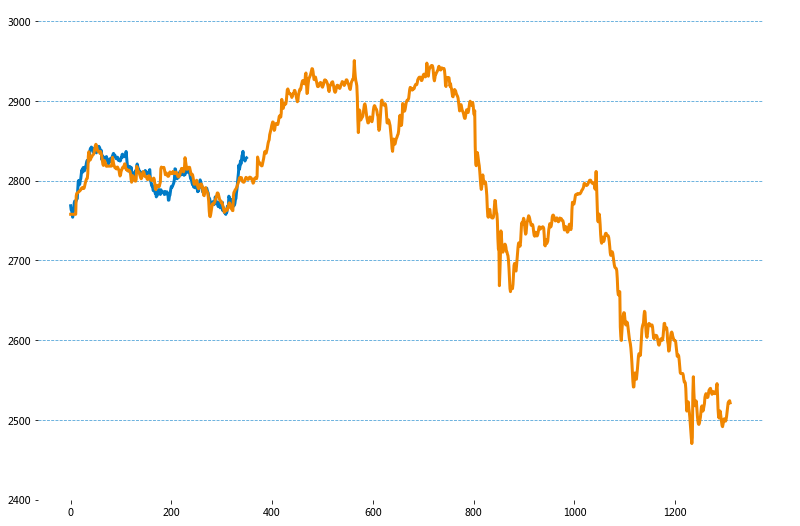

In [169]:
fig = plt.figure()
fig.set_size_inches(13, 9)

ax = fig.add_subplot(111)
ax.plot(
    range(len_now), now['close'], linewidth=3, label='current', c='#007ac6')
plt.ylim((curt['mid'] - future['downward'] * 3, curt['mid'] + future['upward'] * 3))
plt.grid(color='#007ac6', alpha=0.7, axis='y',linestyle = 'dashed')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax2 = ax.twinx()
history = t[best_history_index:best_history_index + len_now + forward_length]
ax2.plot(
    range(len_now + forward_length),
    history,
    linewidth=3,
    label='history',
    c='#f08600')
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.ylim((a, b))
plt.axis('off')

#fig.savefig()

## 输出概率表格

In [217]:
prob_up

0.4166666666666667

In [1]:
import openpyxl
from openpyxl import Workbook
from openpyxl.styles import PatternFill, Font, Border, numbers, Side, Alignment
from openpyxl.drawing.image import Image

In [2]:
index_symbol = '000001.SH'
font_col = Font(name='dengxian', size=20, bold=True, color='FFFFFFFF')
font_panzheng = Font(name='dengxian', size=19, bold=True, color='FFF08600')
font_prob = Font(name='dengxian', size=19, bold=False, color='FF007AC6')

fill_col = PatternFill(fill_type='solid', start_color='FF0070C6', end_color='FF0070C6')
fill_row = PatternFill(fill_type='solid', start_color='FFE4F3FC', end_color='FFE4F3FC')
fill_prob = PatternFill(fill_type='solid', start_color='FFF7F7F7', end_color='FFF7F7F7')

format_percent = numbers.BUILTIN_FORMATS[9]

border_corner1 = Border(left=Side(border_style='thick',color='FF999999'),
                        right=Side(border_style='thin',color='FFFFFFFF'), 
                        top=Side(border_style='thick',color='FF999999'),
                        bottom=Side(border_style='thin',color='FFFFFFFF'))
border_corner2 = Border(left=Side(border_style='thin',color='FFFFFFFF'),
                        right=Side(border_style='thick',color='FF999999'), 
                        top=Side(border_style='thick',color='FF999999'),
                        bottom=Side(border_style='thin',color='FFFFFFFF'))
border_corner3 = Border(left=Side(border_style='thin',color='FFFFFFFF'),
                        right=Side(border_style='thick',color='FF999999'), 
                        top=Side(border_style='thin',color='FFFFFFFF'),
                        bottom=Side(border_style='thick',color='FF999999'))
border_corner4 = Border(left=Side(border_style='thick',color='FF999999'),
                        right=Side(border_style='thin',color='FFFFFFFF'), 
                        top=Side(border_style='thin',color='FFFFFFFF'),
                        bottom=Side(border_style='thick',color='FF999999'))
border_up = Border(left=Side(border_style='thin',color='FFFFFFFF'),
                        right=Side(border_style='thin',color='FFFFFFFF'), 
                        top=Side(border_style='thick',color='FF999999'),
                        bottom=Side(border_style='thin',color='FFFFFFFF'))
border_left = Border(left=Side(border_style='thick',color='FF999999'),
                        right=Side(border_style='thin',color='FFFFFFFF'), 
                        top=Side(border_style='thin',color='FFFFFFFF'),
                        bottom=Side(border_style='thin',color='FFFFFFFF'))
border_right = Border(left=Side(border_style='thin',color='FFFFFFFF'),
                        right=Side(border_style='thick',color='FF999999'), 
                        top=Side(border_style='thin',color='FFFFFFFF'),
                        bottom=Side(border_style='thin',color='FFFFFFFF'))
border_down = Border(left=Side(border_style='thin',color='FFFFFFFF'),
                        right=Side(border_style='thin',color='FFFFFFFF'), 
                        top=Side(border_style='thin',color='FFFFFFFF'),
                        bottom=Side(border_style='thick',color='FF999999'))
border_inside = Border(left=Side(border_style='thin',color='FFFFFFFF'),
                        right=Side(border_style='thin',color='FFFFFFFF'), 
                        top=Side(border_style='thin',color='FFFFFFFF'),
                        bottom=Side(border_style='thin',color='FFFFFFFF'))
alignment=Alignment(horizontal='center',vertical='center',text_rotation=0,wrap_text=False,shrink_to_fit=False,indent=0)

In [7]:
wb = Workbook()
ws = wb.active

prob_up_5, prob_down_5 = cal_prob(0)
prob_up_20, prob_down_20 = cal_prob(1)

ws.append(['5天','概率', '20天', '概率'])
ws.append(['', prob_up_5, '', prob_up_20])
ws.append(['盘整', 0, '盘整', 0])
ws.append(['', prob_down_5, '', prob_down_20])

up, up2 = Image(r'E:\\up.png'), Image(r'E:\\up.png')
down, down2 = Image(r'E:\\down.png'), Image(r'E:\\down.png')
ws.add_image(up, 'A2')
ws.add_image(up2, 'C2')
ws.add_image(down, 'A4')
ws.add_image(down2, 'C4')

"\n\nup, up2 = Image(r'E:\\up.png'), Image(r'E:\\up.png')\ndown, down2 = Image(r'E:\\down.png'), Image(r'E:\\down.png')\nws.add_image(up, 'A2')\nws.add_image(up2, 'C2')\nws.add_image(down, 'A4')\nws.add_image(down2, 'C4')"

In [8]:
for c in ['A','B','C','D']:
    ws.column_dimensions[c].width = 20
for r in range(1,5):
    ws.row_dimensions[r].height = 35

for row in range(1,5):
    for col in range(4):
        ws[row][col].border = border_inside
ws[1][0].border, ws[1][3].border, ws[4][3].border, ws[4][0].border = border_corner1, border_corner2, border_corner3, border_corner4
ws[1][1].border, ws[1][2].border = border_up, border_up
ws[4][1].border, ws[4][2].border = border_down, border_down
ws[2][0].border, ws[3][0].border = border_left, border_left
ws[2][3].border, ws[3][3].border = border_right, border_right

for row in range(1,5):
    for col in [0,2]:
        ws[row][col].fill = fill_row
        ws[row][col].font = font_col
        ws[row][col].alignment = alignment
    for col in [1,3]:
        ws[row][col].fill = fill_prob
        ws[row][col].font = font_prob
        ws[row][col].number_format = format_percent
        ws[row][col].alignment = alignment
for col in range(4):
    ws[1][col].fill = fill_col
    ws[1][col].font = font_col
ws[3][0].font, ws[3][2].font = font_panzheng, font_panzheng

In [10]:
wb.save("E:\\RH\\"+index_symbol+"_Probability.xlsx")

In [ ]:
openpyxl.drawing.shapes.PresetGeometry2D(prst=upArrow, avLst=None)